In [1]:
from array import array
import math

# Keplerian Motion

The great physicist, Johannes Kepler, discovered that the planets orbit the Sun in elliptical orbits.  The Sun is located at one of the foci of the ellipse.  The eccentricity of the ellipse is given by the formula:

$$e = \sqrt{1-\frac{b^2}{a^2}}$$

where $a$ is the semi-major axis and $b$ is the semi-minor axis.  The distance from the centre of the ellipse to the focus is given by the formula:

$$f = \sqrt{a^2-b^2}$$

The orbit of the Earth around the Sun is almost circular with an eccentricity of $e = 0.0167$.  The orbit of Halley's Comet is highly elliptical with an eccentricity of $e = 0.967$.

The equations of motion for a particle in an elliptical orbit are given by:

$$\frac{d^2x}{dt^2} = -\frac{GMx}{r^3}$$
$$\frac{d^2y}{dt^2} = -\frac{GMy}{r^3}$$

where $r = \sqrt{x^2+y^2}$ and $G$ is the gravitational constant.  The initial conditions for the position and velocity of the particle are given by:

$$x(0) = a+f$$
$$y(0) = 0$$

$$v_x(0) = 0$$
$$v_y(0) = \sqrt{\frac{GM}{a}}$$

where $a$ is the semi-major axis of the ellipse.

# Circular Orbit

The simplest case of an elliptical orbit is a circular orbit.  In this case, the semi-major axis is equal to the semi-minor axis, so the eccentricity is zero.  The equations of motion for a circular orbit are given by:

$$\frac{d^2x}{dt^2} = -\frac{GMx}{r^3}$$
$$\frac{d^2y}{dt^2} = -\frac{GMy}{r^3}$$

where $r = \sqrt{x^2+y^2}$ and $G$ is the gravitational constant.  The initial conditions for the position and velocity of the particle are given by:

$$x(0) = r_0$$
$$y(0) = 0$$
$$v_x(0) = 0$$
$$v_y(0) = \sqrt{\frac{GM}{r_0}}$$

where $r_0$ is the radius of the circular orbit.

For planetary motion, a common system of units is one where distances are measured in astronomical units (1 A.U. = 
$1.496 \times 10^{11}$ m) and time is measured in years (1 year = $3.156 \times 10^7$ s).  In SI units, the gravitational constant is given by:

$$G = 6.674 \times 10^{-11} \frac{m^3}{kg \cdot s^2}$$

The mass of the Sun is given by:

$$M = 1.989 \times 10^{30} kg$$

And thus the gravitational constant times the mass of the Sun is given by:

$$GM = 1.32712442099 \times 10^{20} \frac{m^3}{s^2}$$

Converting to astronomical units and years, the gravitational constant times the mass of the Sun is given by:

$$GM = 1.32712442099 \times 10^{20} \frac{m^3}{s^2} \times \frac{1}{(1.496 \times 10^{11} m)^3} \times \frac{(3.156 \times 10^7 s)^2}{1 year} = 4 \pi^2$$

Assuming the earth's orbit to be circular, the radius of the earth's orbit is given by:

$$r_0 = 1 A.U. = 1.496 \times 10^{11} m$$

and the initial velocity will be:

$$v_0 = \sqrt{\frac{GM}{r_0}} = \sqrt{\frac{4 \pi^2}{1}} = 2 \pi$$

In [2]:
# Circular Orbit of radius 1 for testing
#
#r0 = 1.0
#v0 = 2.0*math.pi
#
# Earth - circular with zero eccentricity
#
semi_major = 1.0
eccentricity = 0.0
# Jupiter - circular with zero eccentricity
semi_majorj = 5.2
eccentricityj = 0.0
# Io - circular with zero eccentricity
semi_majori = 0.00282
eccentricityi = 0.0
#
# Halley's Comet
#
#semi_major = 17.834
#eccentricity = 0.967

n_orbits = 1.0 # number of orbits to calculate
tau = 1.0/365.25/1000.0 # time step (in years)
nStep = int(n_orbits/tau) # number of steps to calculate (i.e 10 years for a timestep of 0.01 years)

method = 3 # 1 = Euler, 2 = Euler-Cromer, 3 = Runge-Kutta, 4 = Adaptive Runge-Kutta

# Everything below this point is calculated.
semi_minor = semi_major*math.sqrt(1-eccentricity*eccentricity)
semi_minorj = semi_majorj*math.sqrt(1-eccentricityj*eccentricityj)
semi_minori = semi_majori*math.sqrt(1-eccentricityi*eccentricityi)

mass_Earth = 5.972E+24
mass_Jupiter = 1.898E+27
mass_Io = 8.9319E+22
mass_Sun = 1.989E+30

G = 6.674E-11

GMSIUnits = G*mass_Sun
GMSIUnitsj = G*mass_Sun
GMSIUnitsi = G*mass_Jupiter

SecondsInYear = 31556952
AUnit = 149597870700
GM = GMSIUnits/math.pow(AUnit,3)*math.pow(SecondsInYear,2)
GMj = GMSIUnitsj/math.pow(AUnit,3)*math.pow(SecondsInYear,2)
GMi = GMSIUnitsi/math.pow(AUnit,3)*math.pow(SecondsInYear,2)

F = math.sqrt((semi_major)**2-(semi_minor)**2)  # distance from centre of the ellipse to focus
Fj = math.sqrt((semi_majorj)**2-(semi_minorj)**2)  # distance from centre of the ellipse to focus
Fi = math.sqrt((semi_majori)**2-(semi_minori)**2)  # distance from centre of the ellipse to focus

r0 = semi_major+F
r0j = semi_majorj+Fj
r0i = semi_majori+Fi


v0 = math.sqrt(GM*(2/r0-1/semi_major))
v0j = math.sqrt(GMj*(2/r0j-1/semi_majorj))
v0i = math.sqrt(GMi*(2/r0i-1/semi_majori))

print("Initial Conditions, Earth:")
print("Semi-major axis = ", semi_major, "A.U.")
print("Semi-minor axis = ", semi_minor, "A.U.")
print("Focus = ", F, "A.U.")
print("GM = ", GM, "A.U.^3/year^2")
print("Initial radius = ", r0, "A.U.")
print("Initial velocity = ", v0, "A.U./year")
print("----------------------------------------")

print("Initial Conditions, Jupiter:")
print("Semi-major axis = ", semi_majorj, "A.U.")
print("Semi-minor axis = ", semi_minorj, "A.U.")
print("Focus = ", Fj, "A.U.")
print("GM = ", GMj, "A.U.^3/year^2")
print("Initial radius = ", r0j, "A.U.")
print("Initial velocity = ", v0j, "A.U./year")
print("----------------------------------------")

print("Initial Conditions, Io:")
print("Semi-major axis = ", semi_majori, "A.U.")
print("Semi-minor axis = ", semi_minori, "A.U.")
print("Focus = ", Fi, "A.U.")
print("GM = ", GMi, "A.U.^3/year^2")
print("Initial radius = ", r0i, "A.U.")
print("Initial velocity = ", v0i, "A.U./year")

param = array('d') # for passing parameters to functions
param.append(GM)
paramj = array('d') # for passing parameters to functions
paramj.append(GMj)
parami = array('d') # for passing parameters to functions
parami.append(GMi)

mass = 1.0
massj = 1.0
massi = 1.0
adaptErr = 0.001
time = 0.0

Initial Conditions, Earth:
Semi-major axis =  1.0 A.U.
Semi-minor axis =  1.0 A.U.
Focus =  0.0 A.U.
GM =  39.48524597299331 A.U.^3/year^2
Initial radius =  1.0 A.U.
Initial velocity =  6.283728667995883 A.U./year
----------------------------------------
Initial Conditions, Jupiter:
Semi-major axis =  5.2 A.U.
Semi-minor axis =  5.2 A.U.
Focus =  0.0 A.U.
GM =  39.48524597299331 A.U.^3/year^2
Initial radius =  5.2 A.U.
Initial velocity =  2.7555973097076327 A.U./year
----------------------------------------
Initial Conditions, Io:
Semi-major axis =  0.00282 A.U.
Semi-minor axis =  0.00282 A.U.
Focus =  0.0 A.U.
GM =  0.03767873145135309 A.U.^3/year^2
Initial radius =  0.00282 A.U.
Initial velocity =  3.6553046778228846 A.U./year


In [3]:
# Set up the arrays that will hold the position, velocity, and acceleration components
# The state vector will contain the x and y components of the position and velocity

r = array('d') # two components
v = array('d') # two components
accel = array('d')  # two components

rj = array('d') # two components
vj = array('d') # two components
accelj = array('d')  # two components

ri = array('d') # two components
vi = array('d') # two components
acceli = array('d')  # two components

ris = array('d') # two components
vis = array('d') # two components
accels = array('d')  # two components

# Set up the state vector and deriv vector (for Runge-Kutta)
nState = 4

state = array('d') # four components
deriv = array('d')  # four components

statej = array('d') # four components
derivj = array('d')  # four components

statei = array('d') # four components
derivi = array('d')  # four components

r.append(r0)
r.append(0.0)
v.append(0.0)
v.append(v0)
normR = math.sqrt(r[0]*r[0]+r[1]*r[1])
normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
accel.append(-1.0*GM*r[0]/(normR*normR*normR))
accel.append(-1.0*GM*r[1]/(normR*normR*normR))

rj.append(r0j)
rj.append(0.0)
vj.append(0.0)
vj.append(v0j)
normRj = math.sqrt(rj[0]*rj[0]+rj[1]*rj[1])
normVj = math.sqrt(vj[0]*vj[0]+vj[1]*vj[1])
accelj.append(-1.0*GMj*rj[0]/(normRj*normRj*normRj))
accelj.append(-1.0*GMj*rj[1]/(normRj*normRj*normRj))

ri.append(-r0i)
ri.append(0.0)
vi.append(0.0)
vi.append(-v0i)
normRi = math.sqrt(ri[0]*ri[0]+ri[1]*ri[1])
normVi = math.sqrt(vi[0]*vi[0]+vi[1]*vi[1])
acceli.append(-1.0*GMi*ri[0]/(normRi*normRi*normRi))
acceli.append(-1.0*GMi*ri[1]/(normRi*normRi*normRi))

state.append(r[0])
state.append(r[1])
state.append(v[0])
state.append(v[1])

deriv.append(v[0])
deriv.append(v[1])
deriv.append(accel[0])
deriv.append(accel[1])

statej.append(rj[0])
statej.append(rj[1])
statej.append(vj[0])
statej.append(vj[1])

derivj.append(vj[0])
derivj.append(vj[1])
derivj.append(accelj[0])
derivj.append(accelj[1])

statei.append(ri[0])
statei.append(ri[1])
statei.append(vi[0])
statei.append(vi[1])

derivi.append(vi[0])
derivi.append(vi[1])
derivi.append(acceli[0])
derivi.append(acceli[1])

ris.append(r0i+r0j)
ris.append(0.0)
vis.append(0.0)
vis.append(v0i+v0j)
    
rplot = array('d') # for plot of radius vs. theta
thplot = array('d') # for plot of theta vs. time
tplot = array('d') # for plots vs. time
kinetic = array('d') # plot of kinetic energy vs. time
potential = array('d') # plot of potential energy vs. time
energy = array('d')  # plot of total energy vs. time

rplotj = array('d') # for plot of radius vs. theta
thplotj = array('d') # for plot of theta vs. time
tplotj = array('d') # for plots vs. time
kineticj = array('d') # plot of kinetic energy vs. time
potentialj = array('d') # plot of potential energy vs. time
energyj = array('d')  # plot of total energy vs. time

rploti = array('d') # for plot of radius vs. theta
thploti = array('d') # for plot of theta vs. time
tploti = array('d') # for plots vs. time
kinetici = array('d') # plot of kinetic energy vs. time
potentiali = array('d') # plot of potential energy vs. time
energyi = array('d')  # plot of total energy vs. time

rplotis = array('d') # for plot of radius vs. theta
thplotis = array('d') # for plot of theta vs. time
tplotis = array('d') # for plots vs. time
kineticis = array('d') # plot of kinetic energy vs. time
potentialis = array('d') # plot of potential energy vs. time
energyis = array('d')  # plot of total energy vs. time


We see that with a relatively small timestep, and using the Euler-Cromer method (which should be more stable due
to its reversibility property) that we still have (numerical) oscillations in quantities that should be constant.  Thus, we
seek an improved algorithm.  One such approach is the Runge-Kutta method(s).

Runge-Kutta methods work as follows:

Let an initial value problem be defined as follows:

$$\frac{dy}{dt} = f(t,y)$$
$$y(t_0) = y_0$$

We calculate the value of the function at subsequent timesteps according to:

$$y_{n+1} = y_n + \frac{\tau}{6}(k_1 + 2*k_2 + 2*k_3 + k_4)$$
$$t_{n+1} = t_n + \tau$$

where:

$$k_1 = f(t_n, y_n)$$
$$k_2 = f(t_n+\frac{\tau}{2}, y_n + \tau\frac{k_1}{2})$$
$$k_3 = f(t_n+\frac{\tau}{2}, y_n + \tau\frac{k_2}{2})$$
$$k_4 = f(t_n + \tau, y_n +\tau k_3)$$

So, in order to implement this in code, we need two things:

1. A function which calculates $f(t,y)$, which is the RHS of the differential equation, for various values of $t$ and $y$.
2. A function which calculates $y_{n+1}$ and $t_{n+1}$, using the $f(t,y)$ function defined in Step 1.

These two functions are defined in rk_functions.py, as gravrk() and rk4().  Note that in our case, we are actually solving FOUR differential equations at once (two for position and two for velocity), as defined above.

## Adaptive Runge-Kutta

The adaptive Runge-Kutta method adjusts the step size dynamically during the computation to achieve a desired level of accuracy while optimizing computational effort. One of the most commonly used adaptive Runge-Kutta methods is the embedded Runge-Kutta method, which actually computes two approximations at each step using different orders of the Runge-Kutta method. By comparing these two approximations, the algorithm can estimate the error and adjust the step size accordingly.

Here is a general outline of an adaptive Runge-Kutta method:

### Algorithm

1. **Initialization**
    - Set initial values: $( t_0, y_0 )$
    - Set initial step size $( \tau )$
    - Choose a tolerance $( \rm{TOL} )$
  
2. **Iteration**
    - For each step,  $i$:
        1. Compute $y_{i+1}$ and $\tilde{y}_{i+1}$ using an embedded Runge-Kutta method. These are two approximations, one of higher order and one of lower order.
        2. Compute the error estimate $ e = | y_{i+1} - \tilde{y}_{i+1} | $
        3. If $ e \leq \rm{TOL} $:
            - Accept the higher-order approximation: $ y_{i+1} = y_{i+1} $
            - Update $ t_{i+1} = t_i + \tau $
        4. Update the step size $ \tau $ based on error $ e $ (common strategies include multiplying $\tau$ by $ \left( \frac{\rm{TOL}}{e} \right)^{1/5}$ for 4th order methods)
        5. If the error $ e > \rm{TOL} $, reject the step and try again with the new step size $ \tau $
  
3. **Terminate**
    - Stop when a predefined condition is met, such as reaching a final time, T,  or achieving a specified level of accuracy.

### Key Points

- **Embedded Runge-Kutta method**: This uses two different orders of Runge-Kutta methods to approximate the solution and its error. Common pairs include RK4(5) or RK5(6), where 4 and 5 or 5 and 6 are the orders of the approximations.
  
- **Step-size control**: The algorithm adaptively changes the step size $ \tau $ based on the estimated error \( e \). This is useful in problems where the solution changes rapidly in some intervals and slowly in others.

- **Efficiency**: The adaptive method can be more efficient than a standard fixed step-size Runge-Kutta method because it can adjust the step size dynamically to meet the error requirements.

By using an adaptive Runge-Kutta method, one can often get an accurate solution with fewer steps, thereby saving computational resources.



In [4]:
import rk_functions as rk

for iStep in range(0,nStep):
    normR = math.sqrt(r[0]*r[0]+r[1]*r[1])
    normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
    rplot.append(normR)
    thplot.append(math.atan2(r[1],r[0]))
    tplot.append(time)
    kinetic.append(0.5*mass*normV*normV)
    potential.append(-1.0*GM*mass/normR)
    energy.append(kinetic[iStep]+potential[iStep])
    
    normRj = math.sqrt(rj[0]*rj[0]+rj[1]*rj[1])
    normVj = math.sqrt(vj[0]*vj[0]+vj[1]*vj[1])
    rplotj.append(normRj)
    thplotj.append(math.atan2(rj[1],rj[0]))
    tplotj.append(time)
    kineticj.append(0.5*massj*normVj*normVj)
    potentialj.append(-1.0*GMj*massj/normRj)
    energyj.append(kineticj[iStep]+potentialj[iStep])
    
    normRi = math.sqrt(ri[0]*ri[0]+ri[1]*ri[1])
    normVi = math.sqrt(vi[0]*vi[0]+vi[1]*vi[1])
    rploti.append(normRi)
    thploti.append(math.atan2(ri[1],ri[0]))
    tploti.append(time)
    kinetici.append(0.5*massi*normVi*normVi)
    potentiali.append(-1.0*GMi*massi/normRi)
    energyi.append(kinetici[iStep]+potentiali[iStep])
    
    normRis = math.sqrt(ris[0]*ris[0]+ris[1]*ris[1])
    normVis = math.sqrt(vis[0]*vis[0]+vis[1]*vis[1])
    rplotis.append(normRis)
    thplotis.append(math.atan2(ris[1],ris[0]))
    tplotis.append(time)
    kineticis.append(0.5*massi*normVis*normVis)
    potentialis.append(-1.0*GMi*massi/normRis)
    energyis.append(kineticis[iStep]+potentialis[iStep])
    
    if (method == 1):
        accel[0] = -1.0*GM*r[0]/(normR*normR*normR)
        accel[1] = -1.0*GM*r[1]/(normR*normR*normR)
        r[0] = r[0] + tau*v[0]
        r[1] = r[1] + tau*v[1]
        v[0] = v[0] + tau*accel[0]
        v[1] = v[1] + tau*accel[1]
        
        accelj[0] = -1.0*GMj*rj[0]/(normRj*normRj*normRj)
        accelj[1] = -1.0*GMj*rj[1]/(normRj*normRj*normRj)
        rj[0] = rj[0] + tau*vj[0]
        rj[1] = rj[1] + tau*vj[1]
        vj[0] = vj[0] + tau*accelj[0]
        vj[1] = vj[1] + tau*accelj[1]
        
        acceli[0] = -1.0*GMi*ri[0]/(normRi*normRi*normRi)
        acceli[1] = -1.0*GMi*ri[1]/(normRi*normRi*normRi)
        ri[0] = ri[0] + tau*vi[0]
        ri[1] = ri[1] + tau*vi[1]
        vi[0] = vi[0] + tau*acceli[0]
        vi[1] = vi[1] + tau*acceli[1]
        
        ris[0] = ri[0] + rj[0]
        ris[1] = ri[1] + rj[1]
        vis[0] = vi[0] + vj[0]
        vis[1] = vi[1] + vj[1]
        #print(r[0],r[1],v[0],v[1])
        time = time + tau
    else:
        if (method == 2):
            accel[0] = -1.0*GM*r[0]/(normR*normR*normR)
            accel[1] = -1.0*GM*r[1]/(normR*normR*normR)
            v[0] = v[0] + tau*accel[0]
            v[1] = v[1] + tau*accel[1]
            r[0] = r[0] + tau*v[0]
            r[1] = r[1] + tau*v[1]
            
            accelj[0] = -1.0*GMj*rj[0]/(normRj*normRj*normRj)
            accelj[1] = -1.0*GMj*rj[1]/(normRj*normRj*normRj)
            vj[0] = vj[0] + tau*accelj[0]
            vj[1] = vj[1] + tau*accelj[1]
            rj[0] = rj[0] + tau*vj[0]
            rj[1] = rj[1] + tau*vj[1]
            
            acceli[0] = -1.0*GMi*ri[0]/(normRi*normRi*normRi)
            acceli[1] = -1.0*GMi*ri[1]/(normRi*normRi*normRi)
            vi[0] = vi[0] + tau*acceli[0]
            vi[1] = vi[1] + tau*acceli[1]
            ri[0] = ri[0] + tau*vi[0]
            ri[1] = ri[1] + tau*vi[1]
            
            ris[0] = ri[0] + rj[0]
            ris[1] = ri[1] + rj[1]
            vis[0] = vi[0] + vj[0]
            vis[1] = vi[1] + vj[1]
            
            #print(r[0],r[1],v[0],v[1])
            time = time + tau
        else:
            if (method == 3):
                rk.rk4(state,nState,time,tau,deriv,param)
                r[0]=state[0]
                r[1]=state[1]
                v[0]=state[2]
                v[1]=state[3]
                
                rk.rk4(statej,nState,time,tau,derivj,paramj)
                rj[0]=statej[0]
                rj[1]=statej[1]
                vj[0]=statej[2]
                vj[1]=statej[3]
                
                rk.rk4(statei,nState,time,tau,derivi,parami)
                ri[0]=statei[0]
                ri[1]=statei[1]
                vi[0]=statei[2]
                vi[1]=statei[3]
                
                ris[0] = ri[0] + rj[0]
                ris[1] = ri[1] + rj[1]
                vis[0] = vi[0] + vj[0]
                vis[1] = vi[1] + vj[1]
                
                time = time + tau
            else:
                if (method == 4):
                    rk.rka(state,nState,time,tau,adaptErr,deriv,param)
                    r[0]=state[0]
                    r[1]=state[1]
                    v[0]=state[2]
                    v[1]=state[3]
                    
                    rk.rka(statej,nState,time,tau,adaptErr,derivj,paramj)
                    rj[0]=statej[0]
                    rj[1]=statej[1]
                    vj[0]=statej[2]
                    vj[1]=statej[3]
                    
                    rk.rka(statei,nState,time,tau,adaptErr,derivi,parami)
                    ri[0]=statei[0]
                    ri[1]=statei[1]
                    vi[0]=statei[2]
                    vi[1]=statei[3]
                    
                    ris[0] = ri[0] + rj[0]
                    ris[1] = ri[1] + rj[1]
                    vis[0] = vi[0] + vj[0]
                    vis[1] = vi[1] + vj[1]
                    
                    time = time + tau

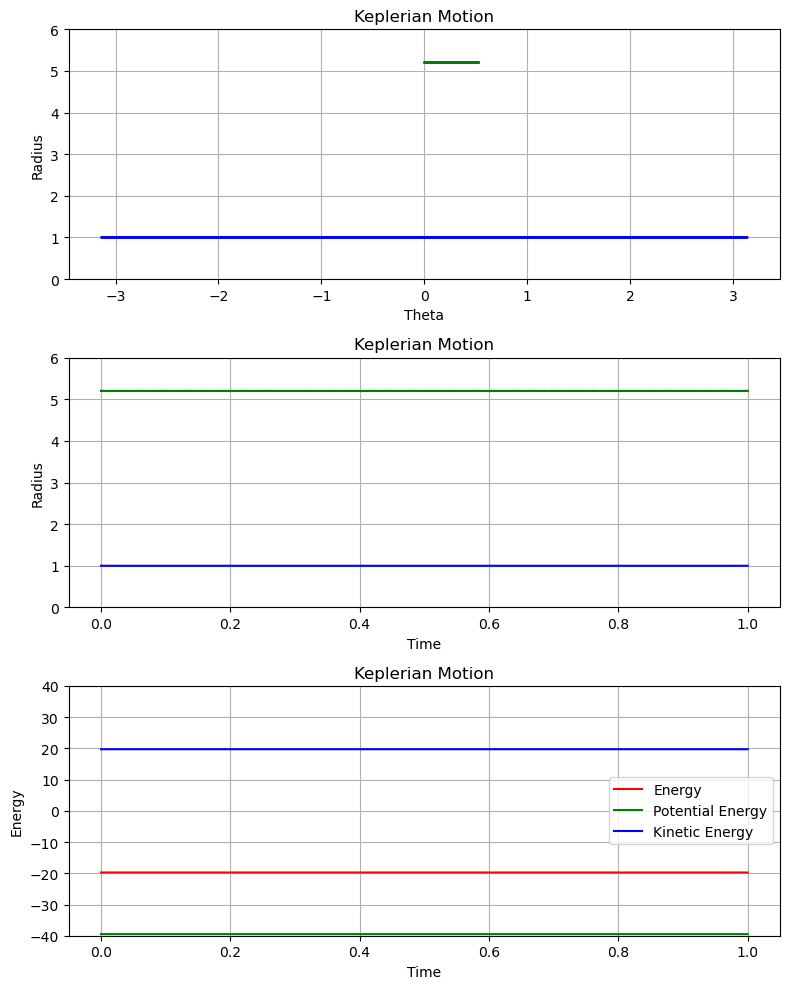

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))

# Limits for Earth Orbit
if method == 1:
    ylim_low = 0.0
    ylim_high = 6.0
elif method == 2:
    ylim_low = 0.9
    ylim_high = 1.1
elif method == 3:
    ylim_low = 0.0
    ylim_high = 6.0
else:
    ylim_low = 0.99
    ylim_high =1.01
    
# Limits for Halley's Comet
#if method == 1:
#    ylim_low = 0.0
#    ylim_high = 100.0
#elif method == 2:
#    ylim_low = 0.0
#    ylim_high = 40.0
#elif method == 3:
#    ylim_low = 0.0
#    ylim_high = 40.0
#else:
#    ylim_low = 0.0
#    ylim_high = 20.0

# Keplerian Motion - Radius vs. Theta
ax1.plot(thplot, rplot, marker='', linestyle='-', color='blue')
ax1.plot(thplotj, rplotj, marker='', linestyle='-', color='red')
ax1.plot(thplotis, rplotis, marker='', linestyle='-', color='green')
ax1.set_title('Keplerian Motion')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Radius')
ax1.set_ylim(ylim_low, ylim_high)
ax1.grid(True)

# Keplerian Motion - Radius vs. Time
ax2.plot(tplot, rplot, marker='', linestyle='-', color='blue')
ax2.plot(tplotj, rplotj, marker='', linestyle='-', color='red')
ax2.plot(tplotis, rplotis, marker='', linestyle='-', color='green')
ax2.set_title('Keplerian Motion')
ax2.set_xlabel('Time')
ax2.set_ylabel('Radius')
ax2.set_ylim(ylim_low, ylim_high)
ax2.grid(True)

# Keplerian Motion - Time vs. Energy
ax3.plot(tplot, energy, marker='', linestyle='-', color='red', label='Energy')
ax3.plot(tplot, potential, marker='', linestyle='-', color='green', label='Potential Energy')
ax3.plot(tplot, kinetic, marker='', linestyle='-', color='blue', label='Kinetic Energy')
ax3.set_title('Keplerian Motion')
ax3.set_xlabel('Time')
ax3.set_ylabel('Energy')
ax3.set_ylim(-40, 40)
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

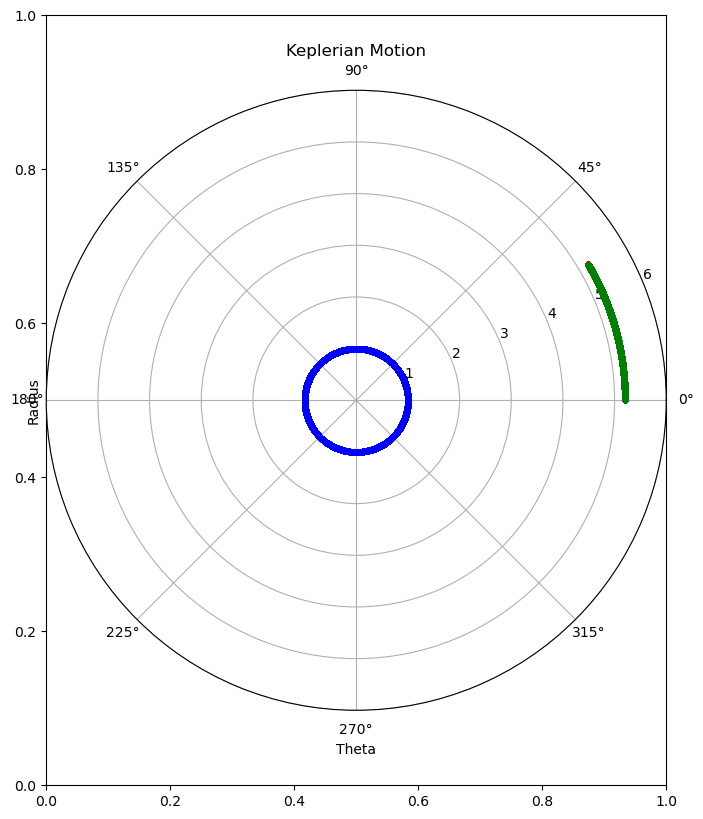

In [6]:
fig1 = plt.subplots(figsize=(8, 10))
ax1 = plt.subplot(111, projection='polar')

# Keplerian Motion - Theta vs. Radius
ax1.plot(thplot, rplot, marker='.', linestyle='-', color='blue')
ax1.plot(thplotj, rplotj, marker='.', linestyle='-', color='red')
ax1.plot(thplotis, rplotis, marker='.', linestyle='--', color='green')
ax1.set_title('Keplerian Motion')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Radius')
ax1.set_ylim(ylim_low, ylim_high)
ax1.grid(True)

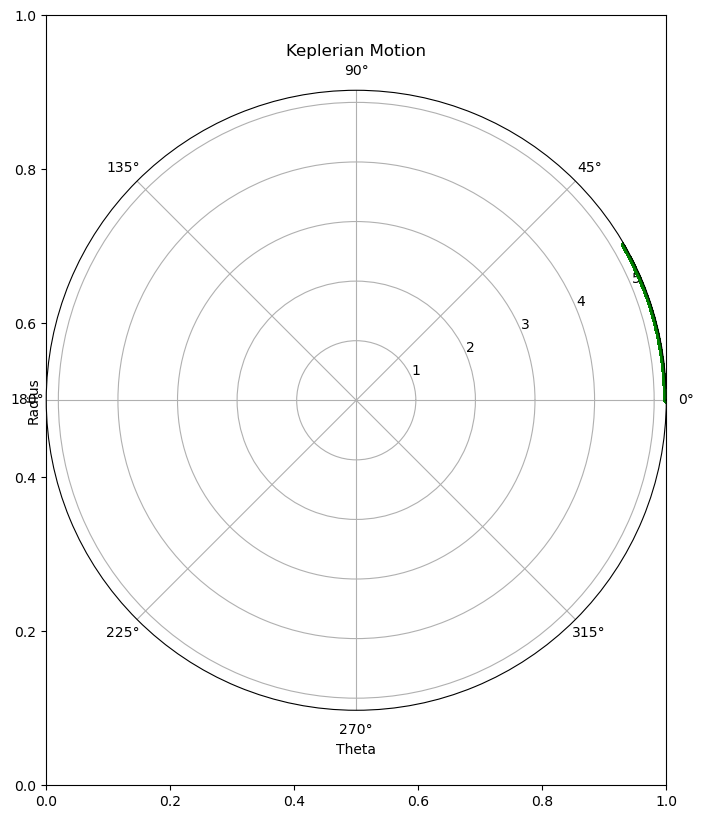

In [7]:
fig1 = plt.subplots(figsize=(8, 10))
ax1 = plt.subplot(111, projection='polar')

# Keplerian Motion - Theta vs. Radius
ax1.plot(thplotis, rplotis, marker='.', linestyle='-', color='green')
ax1.set_title('Keplerian Motion')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Radius')
#ax1.set_ylim(ylim_low, ylim_high)
ax1.grid(True)

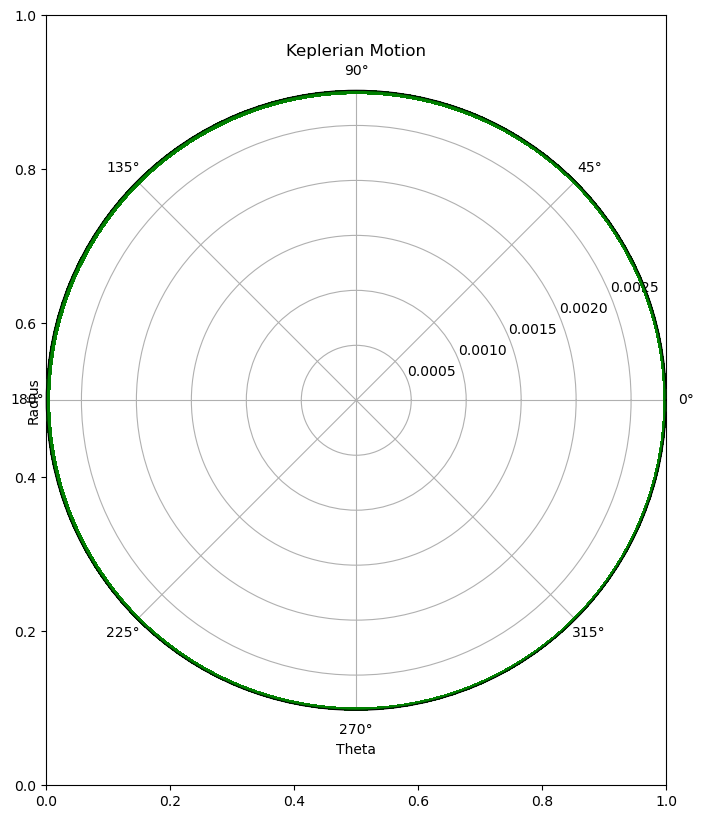

In [8]:
fig1 = plt.subplots(figsize=(8, 10))
ax1 = plt.subplot(111, projection='polar')

# Keplerian Motion - Theta vs. Radius
ax1.plot(thploti, rploti, marker='.', linestyle='-', color='green')
ax1.set_title('Keplerian Motion')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Radius')
#ax1.set_ylim(ylim_low, ylim_high)
ax1.grid(True)

205
365250


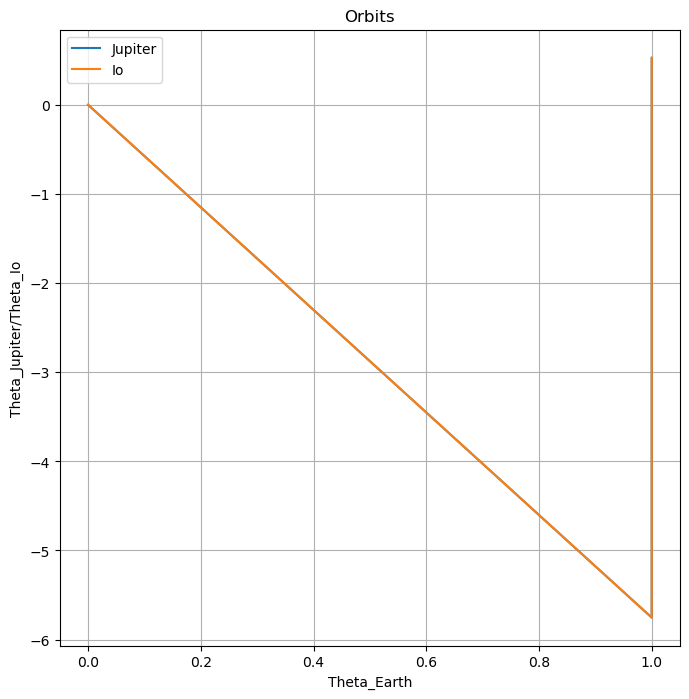

In [9]:
import numpy as np

theta_earth = np.array(thplot)
theta_jupiter = np.array(thplotj)
for i in range(len(theta_earth)):
    if theta_earth[i] < 0:
        theta_earth[i] = theta_earth[i] + 2*math.pi
theta_io= np.array(thplotis)
time = np.array(tplot)

theta_io_earth = theta_io - theta_earth
theta_jupiter_earth = theta_jupiter - theta_earth

theta_diff = theta_io_earth - theta_jupiter_earth

# plot the data
fig, ax = plt.subplots(figsize=(8, 8))
#ax.plot(time, theta_diff, linestyle='--', color='blue',label='Io')
ax.plot(time, theta_jupiter_earth, label = 'Jupiter')
ax.plot(time, theta_io_earth, label = 'Io')
ax.set_title('Orbits')
ax.set_xlabel('Theta_Earth')
ax.set_ylabel('Theta_Jupiter/Theta_Io')
ax.grid(True)
ax.legend()

# Calculate the periods
periods = []
found = False
for i in range(len(theta_diff)-1):
    if theta_diff[i] < 0 and theta_diff[i+1] > 0:
        if found == False:
            found = True
            old_time = time[i]
        else:
            periods.append((time[i]-old_time)*365.25)
            old_time = time[i]
        
print(len(periods))
print(len(time))

Text(0.5, 0, 'Time')

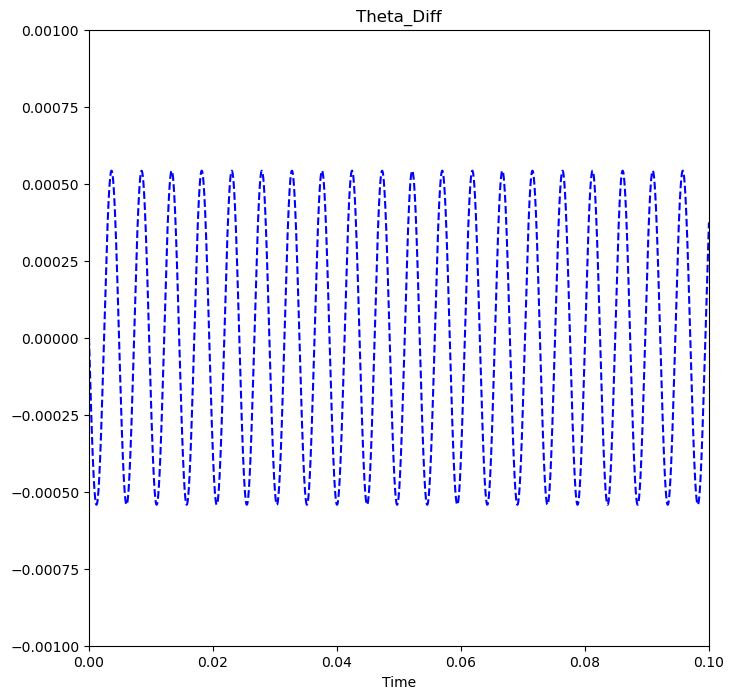

In [10]:
# plot theta_diff

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(time, theta_diff, linestyle='--', color='blue',label='Io')
ax.set_title('Theta_Diff')
ax.set_ylim(-0.001, 0.001)
ax.set_xlim(0,0.1)
ax.set_xlabel('Time')

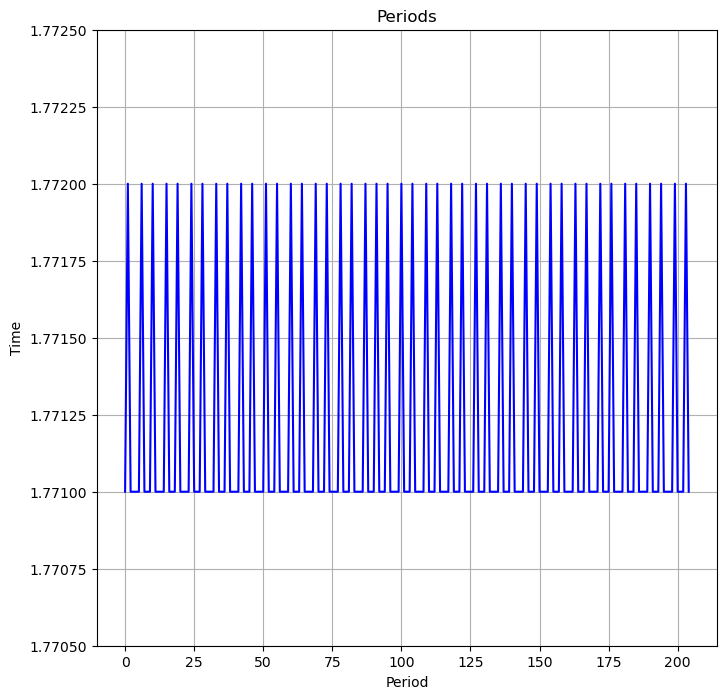

In [11]:
# plot the periods
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(periods, linestyle='-', color='blue',label='Io')
ax.set_title('Periods')
ax.set_xlabel('Period')
ax.set_ylabel('Time')
ax.set_ylim(1.7705, 1.7725)
ax.grid(True)
